# Import libraries

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Import dataset

In [68]:
X,y = load_diabetes(return_X_y=True)

In [69]:
X.shape

(442, 10)

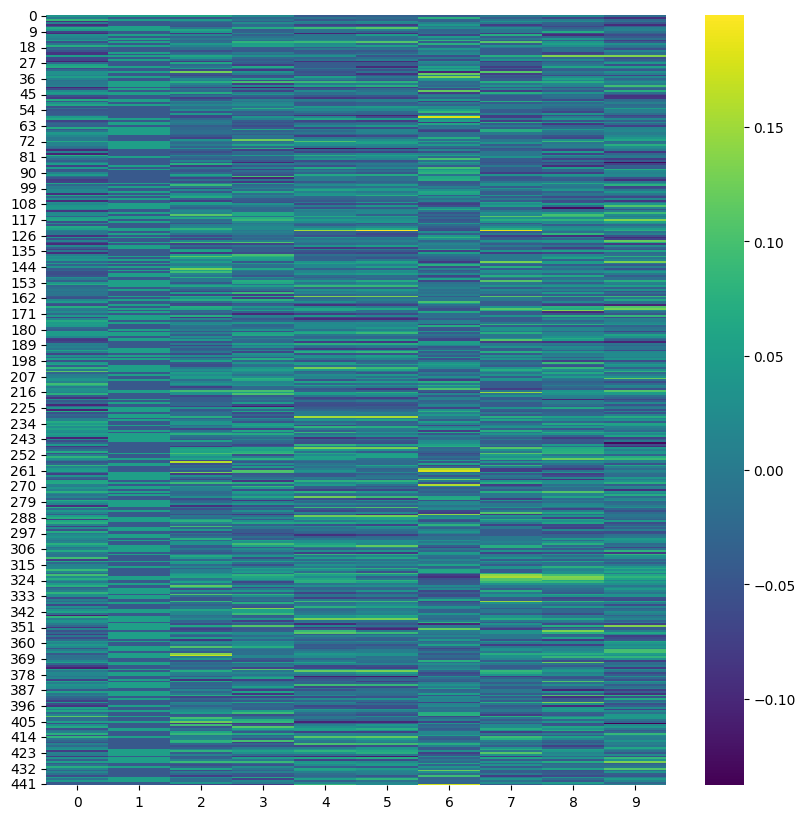

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(X, cmap='viridis')
plt.show()

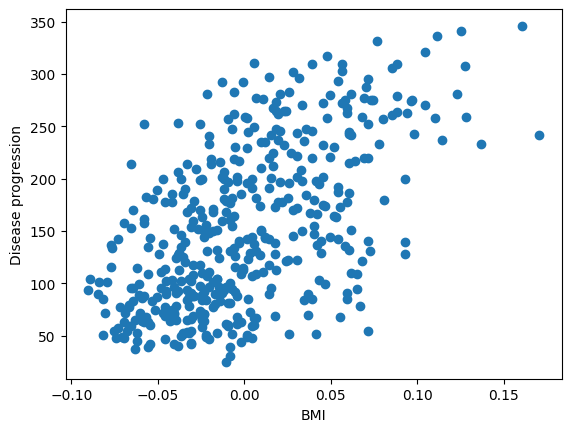

In [71]:
plt.scatter(X[:,2], y)
plt.xlabel('BMI')
plt.ylabel('Disease progression')
plt.show()

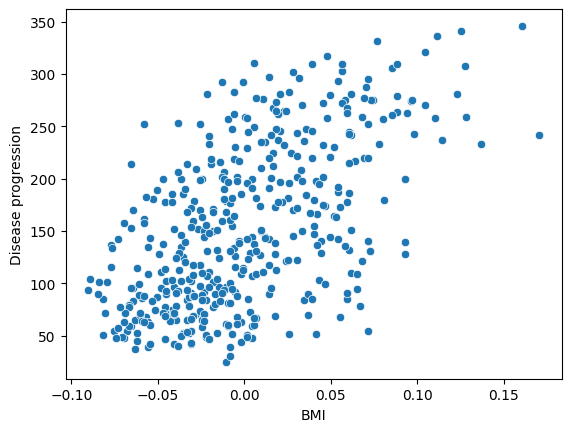

In [72]:
sns.scatterplot(x=X[:,2], y=y)
plt.xlabel('BMI')
plt.ylabel('Disease progression')
plt.show()

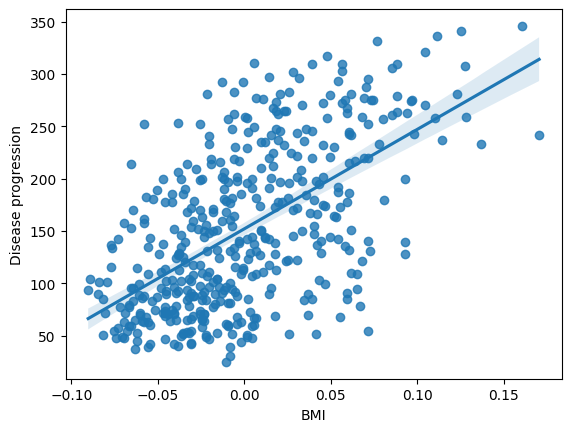

In [73]:
sns.regplot(x=X[:,2], y=y)
plt.xlabel('BMI')
plt.ylabel('Disease progression')
plt.show()

# Train test split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

# Apply Linear Regression

In [76]:
reg1 = LinearRegression()
reg1.fit(X_train, y_train)

LinearRegression()

In [77]:
reg1.intercept_

151.34560453985995

In [78]:
reg1.coef_

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

In [79]:
y_pred = reg1.predict(X_test)

In [80]:
r2_score(y_test, y_pred)

0.4526027629719195

# Make Custome GD class

In [81]:
class CustomeGD:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X_train, y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):

            # find the intercept (c)
            y_hat = np.dot(X_train, self.coef_) + self.intercept_
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)

            # find the coef
            coef_der = -2 * np.dot((y_train - y_hat), X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [82]:
reg2 = CustomeGD(learning_rate=0.01, epochs=10000)
reg2.fit(X_train, y_train)

In [83]:
 reg2.intercept_

152.26209590714075

In [84]:
reg2.coef_

array([  57.34394781,  -43.56606515,  270.24217012,  192.89418762,
         27.77334657,    2.39410532, -146.58458473,  136.69868135,
        224.3195029 ,  134.95819099])

In [85]:
y_pred2 = reg2.predict(X_test)

In [86]:
r2_score(y_test, y_pred2)

0.4166339916248297

# Value verifications

In [87]:
reg1.intercept_ - reg2.intercept_

-0.9164913672807984

In [88]:
reg1.coef_ - reg2.coef_

array([ -19.43992646, -198.39829716,  272.1865884 ,  154.80965629,
       -959.26219246,  515.66817167,  310.00456772,  138.61922023,
        511.87935601,  -86.28753356])

In [89]:
reg1.coef_

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

In [90]:
reg2.coef_

array([  57.34394781,  -43.56606515,  270.24217012,  192.89418762,
         27.77334657,    2.39410532, -146.58458473,  136.69868135,
        224.3195029 ,  134.95819099])